In [ ]:
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&ac

#**구글드라이브 경로 연결**

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

#**필요한 라이브러리설치**

In [ ]:
#default code
!pip3 install torch torchvision
!pip3 install opencv-python~=4.5
!pip3 install torchsummary


     |████████████████████████████████| 49.9 MB 16 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


CPU 및 GPU
CPU(Central Proccessing Unit): 
- 컴퓨터의 두뇌와 같으며, 프로그램에서 분석한 알고리즘에 따라 행동을 결정하고 작업 우선순위를 지정하는 등 컴퓨터를 지휘하는 역할을 수행
- 순차적 작업(Sequential task)

GPU(Graphic Processing Unit)
- 비디오, 이미지와 같이 픽셀로 이루어진 영상을 처리하는 역할
- 대량의 연산을 수행하며 이를 병렬적으로 나눠 작업하기 때문에 CPU에 비해 속도가 빠름
- 병렬적 작업(Paralell task)

#텐서(Tensor)


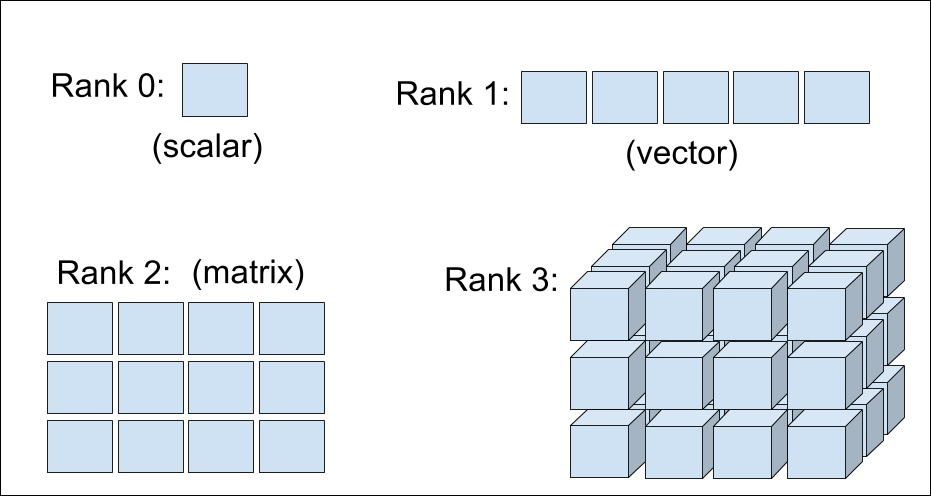

In [26]:
from IPython.display import Image
Image('/Users/escortkwon/PycharmProjects/Advanced_AI_Course/4th Week/Image/tensor.jpg')

데이터를 Tensor에 담는 방법

In [1]:
import numpy as np
import torch

data = [[1, 2],[3, 4]]
print("data shape: {}\n type: {}".format(len(data),  type(data)))
x_data = torch.tensor(data)

print("x_data shape: {}\n type: {}".format(x_data.shape,  type(x_data)))

data shape: 2
 type: <class 'list'>
x_data shape: torch.Size([2, 2])
 type: <class 'torch.Tensor'>


Numpy 배열로부터 생성

In [2]:
np_array = np.array(data)
print("np_array shape: {}\n type: {}".format(np_array.shape,  type(np_array)))
x_np = torch.from_numpy(np_array)
print("x_np shape: {}\n type: {}".format(x_np.shape,  type(x_np)))

np_array shape: (2, 2)
 type: <class 'numpy.ndarray'>
x_np shape: torch.Size([2, 2])
 type: <class 'torch.Tensor'>


In [3]:
import numpy as np
import torch

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [4]:
import numpy as np
import torch

# GPU가 존재하면 텐서를 이동합니다
tensor = torch.rand(3,4)

if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [5]:
import numpy as np
import torch

tensor = torch.rand(1,3,4)

if torch.cuda.is_available():
  tensor = tensor.to('cuda')

t1 = torch.cat([tensor, tensor, tensor], dim=0)
t2 = torch.cat([tensor, tensor, tensor], dim=1)
t3 = torch.cat([tensor, tensor, tensor], dim=2)
print(t1.shape)
print(t1)
print(t2.shape)
print(t2)
print(t3.shape)
print(t3)

torch.Size([3, 3, 4])
tensor([[[0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 0.9736],
         [0.8685, 0.0140, 0.5816, 0.7496]],

        [[0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 0.9736],
         [0.8685, 0.0140, 0.5816, 0.7496]],

        [[0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 0.9736],
         [0.8685, 0.0140, 0.5816, 0.7496]]])
torch.Size([1, 9, 4])
tensor([[[0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 0.9736],
         [0.8685, 0.0140, 0.5816, 0.7496],
         [0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 0.9736],
         [0.8685, 0.0140, 0.5816, 0.7496],
         [0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 0.9736],
         [0.8685, 0.0140, 0.5816, 0.7496]]])
torch.Size([1, 3, 12])
tensor([[[0.9770, 0.3468, 0.6096, 0.4914, 0.9770, 0.3468, 0.6096, 0.4914,
          0.9770, 0.3468, 0.6096, 0.4914],
         [0.9510, 0.2504, 0.1926, 

0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


/Users/escortkwon/miniforge3/envs/Practice_CV/lib/python3.8/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-yskbf5h8/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


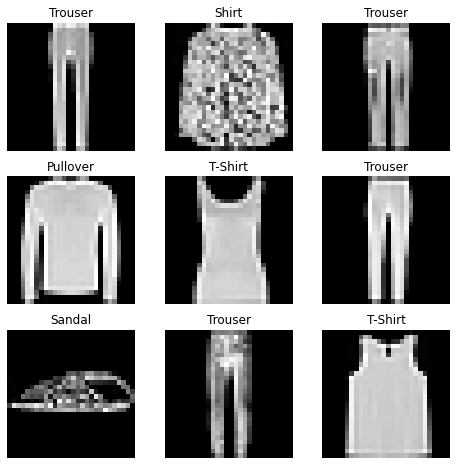

In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))#8inches x 8inches
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


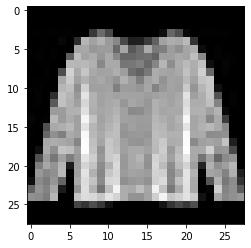

Label: [tensor(2)]


In [8]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {[label]}")

#데이터셋 준비
- 데이터셋 다운로드
    - torchvision에서 제공하는 공개 데이터셋으로 CIFAR10, PASCAL VOC, COCO, IMAGENET 등 다양한 데이터셋을 다운받을 수 있음
    - batch_size: 반복작업 시 한번에 몇장의 이미지를 사용하는가
    - 

- 데이터셋 변환함수
    - 데이터셋이 많이 있지 않을 경우 사용하는 방법
    - 데이터셋의 다양성을 추가로 넣기 위해 다양한 변환 함수를 적용함

0it [00:00, ?it/s]

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([4, 3, 32, 32])
Labels batch shape: torch.Size([4])
torch.Size([3, 32, 32])


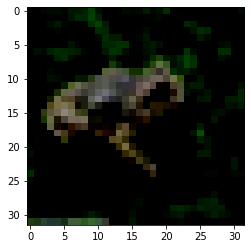

Label: frog


In [9]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
# from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import cv2
import numpy as np
'''
torchvision.transforms.CenterCrop(10)
torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
torchvision.transforms.FiveCrop(size)
torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')
torchvision.transforms.RandomHorizontalFlip(p=0.5)
torchvision.transforms.RandomVerticalFlip(p=0.5)
torchvision.transforms.RandomRotation(degrees, interpolation=<InterpolationMode.NEAREST: 'nearest'>, expand=False, center=None, fill=0, resample=None)
torchvision.transforms.Resize(size, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, max_size=None, antialias=None)
torchvision.transforms.Scale(*args, **kwargs)
'''
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
print(img.shape)
img = img.numpy()
img = np.transpose(img, (1,2,0))
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {classes[label]}")

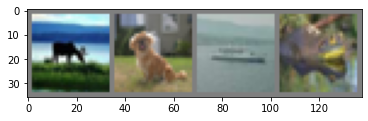

 deer   dog  ship  frog


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#합성곱 신경망(Convolutional Neural Network) 정의하기

Conv 레이어
- torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

Maxpooling 레이어
- torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

Fully Convolution 레이어
- torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

Activation 함수
- torch.nn.ReLU(inplace=False)

In [12]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
# net.to(device)
# summary(net, (3, 32, 32))

#손실 함수와 Optimizer정의하기
교차 엔트로피 손실(Cross-Entropy loss)과 모멘텀(momentum) 값을 갖는 SGD를 사용

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#신경망 학습하기

[1,  2000] loss: 2.120
[1,  4000] loss: 1.814
[1,  6000] loss: 1.663
[1,  8000] loss: 1.566
[1, 10000] loss: 1.497
[1, 12000] loss: 1.459
[2,  2000] loss: 1.383
[2,  4000] loss: 1.379
[2,  6000] loss: 1.349
[2,  8000] loss: 1.285
[2, 10000] loss: 1.284
[2, 12000] loss: 1.271
Finished Training 119.28087997436523sec


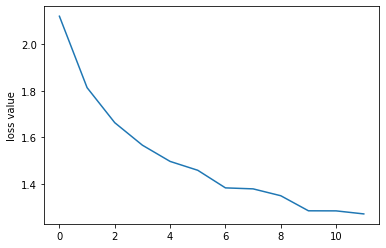

In [15]:
import time

start_time = time.time()
loss_ = []
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            loss_itr = running_loss / 2000
            loss_.append(loss_itr)
            running_loss = 0.0

end_time = time.time()
print('Finished Training {}sec'.format(end_time-start_time))
plt.plot(loss_)
plt.ylabel('loss value')
plt.show()

#학습모델 저장

In [19]:
PATH = '/Users/escortkwon/PycharmProjects/Advanced_AI_Course/4th Week/cifar_net.pth'
torch.save(net.state_dict(), PATH)

#학습모델 로드 및 테스트

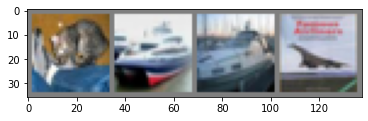

GroundTruth:    cat  ship  ship plane


In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse horse horse horse


In [21]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [22]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
print(correct_pred)
total_pred = {classname: 0 for classname in classes}
print(total_pred)

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))
print(correct_pred)
print(total_pred)

{'plane': 0, 'car': 0, 'bird': 0, 'cat': 0, 'deer': 0, 'dog': 0, 'frog': 0, 'horse': 0, 'ship': 0, 'truck': 0}
{'plane': 0, 'car': 0, 'bird': 0, 'cat': 0, 'deer': 0, 'dog': 0, 'frog': 0, 'horse': 0, 'ship': 0, 'truck': 0}
Accuracy for class plane is: 0.0 %
Accuracy for class car   is: 0.0 %
Accuracy for class bird  is: 0.0 %
Accuracy for class cat   is: 0.0 %
Accuracy for class deer  is: 0.0 %
Accuracy for class dog   is: 0.0 %
Accuracy for class frog  is: 0.0 %
Accuracy for class horse is: 81.8 %
Accuracy for class ship  is: 0.0 %
Accuracy for class truck is: 21.5 %
{'plane': 0, 'car': 0, 'bird': 0, 'cat': 0, 'deer': 0, 'dog': 0, 'frog': 0, 'horse': 818, 'ship': 0, 'truck': 215}
{'plane': 1000, 'car': 1000, 'bird': 1000, 'cat': 1000, 'deer': 1000, 'dog': 1000, 'frog': 1000, 'horse': 1000, 'ship': 1000, 'truck': 1000}


#GPU를 사용한 학습하기

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cpu


In [24]:
net.to(device)
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
[2,  2000] loss: 2.304
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.302
[2, 12000] loss: 2.303
Finished Training 111.09079694747925sec


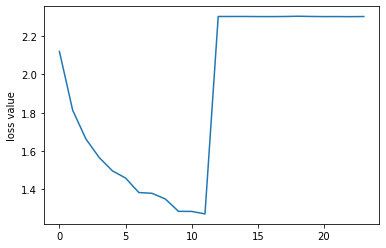

In [25]:
import time

start_time = time.time()
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            loss_itr = running_loss / 2000
            loss_.append(loss_itr)
            running_loss = 0.0
end_time = time.time()
print('Finished Training {}sec'.format(end_time-start_time))
plt.plot(loss_)
plt.ylabel('loss value')
plt.show()